In [1]:
import sys
import os

sys.path.append(os.path.abspath("Datasets"))

# Moore's Law
- Linear regression: many problems, even don't seem linear at first
- Discover "correlation" in Data
- When it's exponential, use Log -> Linear

# 1-D Linear Regression:
1. Define the model in 1-D, derive the solution

- Starts with training samples:
- Inputs: x1, x2, ..., xN
- Outputs: y1, y2, ..., yN => Supervised learning

- Coding 1D Solution (See notes 1_ for more details)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
X = []
Y = []
for line in open("Datasets/data_1d.csv"):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

In [9]:
# Turn X, Y to numpy array
X = np.array(X)
Y = np.array(Y)

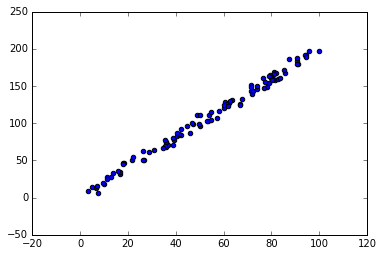

In [10]:
plt.scatter(X, Y)

- Apply Equation we learned to calculate a and b (y^ = ax + b)

In [13]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [14]:
# Calculate y^ = ax + b
y_hat = a*X + b

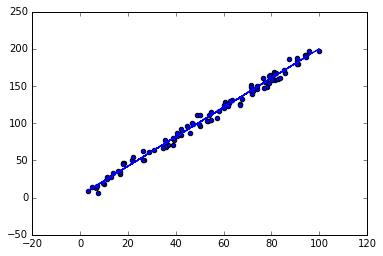

In [16]:
# Plot all:
plt.scatter(X, Y)
plt.plot(X, y_hat)

## R-squared for model prediction
- See note 2_


In [19]:
d1 = Y - y_hat
d2 = Y - Y.mean()

r2 = 1 - d1.dot(d1) / d2.dot(d2)
r2

0.99118382029778052

- We see that the result is very close to 1, so it's a good model

## Now the Moore's Law implementation

In [20]:
import re
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

for line in open('Datasets/moore.csv'):
    r = line.split('\t')
    
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    
    X.append(x)
    Y.append(y)

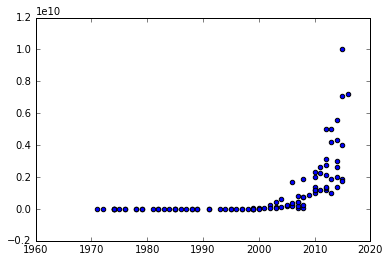

In [25]:
# Convert to numpy array
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)

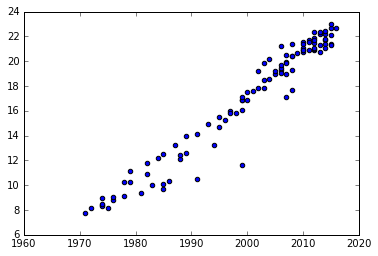

In [26]:
Y = np.log(Y)
plt.scatter(X, Y)

- We see that now it becomes linear

In [27]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

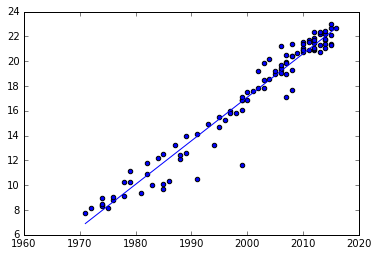

In [28]:
Y_hat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [29]:
# Compute R_square to see how's good the data is
d1 = Y - Y_hat
d2 = Y - Y.mean()

r2 = 1 - d1.dot(d1) / d2.dot(d2)
r2

0.95294428522857599

In [30]:
# log(tc) = a*year + b; tc: transistors count
# tc = exp(b) * exp(a*year)
# 2*tc = 2 * exp(b) * exp(a * year) = exp(ln(2))* exp(b) * exp(a * year)
#      = exp(b) * exp(a * year + ln(2))
# exp(b) * exp(a*year2) = exp(b) * exp(a * year1 + ln2)
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2 / a
# Time to double:
np.log(2) / a

1.9745331723797188

## Multidimensional linear regression
- See note 3_
- Dataset: first column x1, second x2, third y

In [31]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
# Load the data
X = []
Y = []
for line in open('Datasets/data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1])
    Y.append(float(y))
    

In [33]:
# Turn X, Y to np array
X = np.array(X)
Y = np.array(Y)

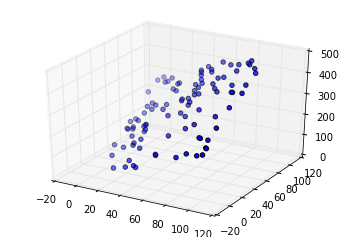

In [35]:
# Let's plot the data to see what the data looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [38]:
# Calculate weights
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Y_hat = np.dot(X, w)

# calculate r-squared
d1 = Y - Y_hat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)

In [39]:
r2

0.99800406124757779

## Polynomial regression
- Cubic, quadratic...
- Can still use linear regression despite the name
- Linear: weight parameters are linear, not about x


In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
# Load the data
X = []
Y = []

for line in open('Datasets/data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x])
    Y.append(float(y))


In [43]:
# Convert data to numpy array
X = np.array(X)
Y = np.array(Y)

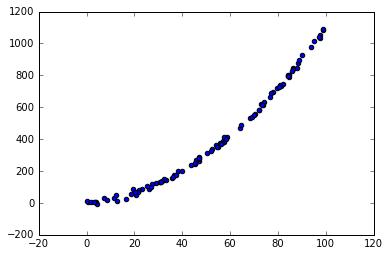

In [47]:
# Let's plot to see how data looks like
plt.scatter(X[:, 1], Y)

In [48]:
# Calculate weights
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Y_hat = np.dot(X, w)

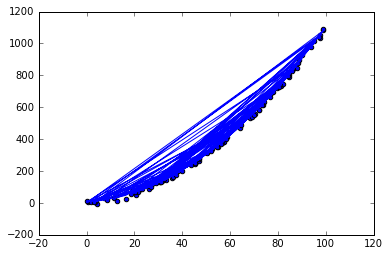

In [49]:
# Plot it all together
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], Y_hat)

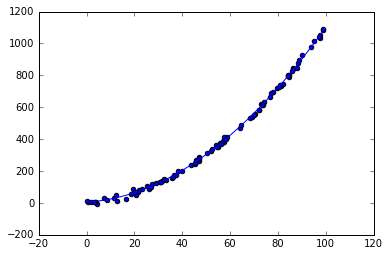

In [53]:
plt.scatter(X[:, 1], Y)
plt.plot(sorted(X[:, 1]), sorted(Y_hat)) 
# Quadratic: Monitonicly increasing, so we need to sort to guarantee
# the order

## A Case study: Predicting systolic blood pressure from Age and Weight

In [54]:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# need to sudo pip install xlrd to use pd.read_excel
# data is from:
# http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html

# The data (X1, X2, X3) are for each patient.
# X1 = systolic blood pressure
# X2 = age in years
# X3 = weight in pounds

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
df = pd.read_excel('Datasets/mlr02.xls')
X = df.as_matrix()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


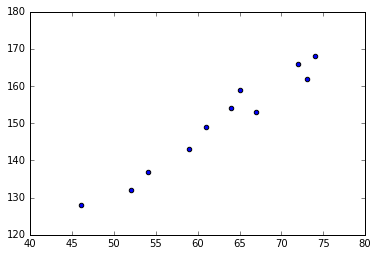

In [57]:
# using age to predict systolic blood pressure
plt.scatter(X[:,1], X[:,0])

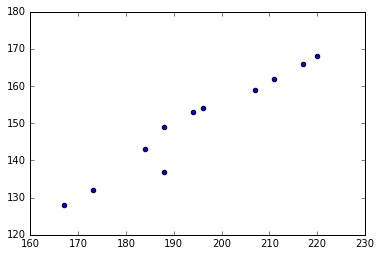

In [58]:

# using weight to predict systolic blood pressure
plt.scatter(X[:,2], X[:,0])

In [59]:
df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]


In [60]:
def get_r2(X, Y):
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y) )
    Yhat = X.dot(w)

    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [61]:
get_r2(X2only, Y)

0.95784072081473548

In [62]:
get_r2(X3only, Y)

0.9419952085293064

In [63]:
get_r2(X, Y)

0.97684710415020914

## Generalization - Overfitting, training and test sets
### A perfect model:
- An infinite Taylor series can approximate any function (The more terms, the more exact)
- Not fit past data, but predict future data

-> It's called "generalization error"
- Split data into training and test sets
- At some points, test set error will increase -> stop before it or it will become overfitting (In-sample error decrease, but out-of-sample error will be very large)

In [64]:
# Overfitting
# notes for this course can be found at:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# https://www.udemy.com/data-science-linear-regression-in-python


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def make_poly(X, deg): # Make polynomial
    n = len(X)
    data = [np.ones(n)]
    for d in xrange(deg):
        data.append(X**(d+1))
    return np.vstack(data).T


def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))


def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()


def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)


def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx] # Take random samples from X
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in xrange(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx] # Take rest samples from X for testing
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in xrange(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

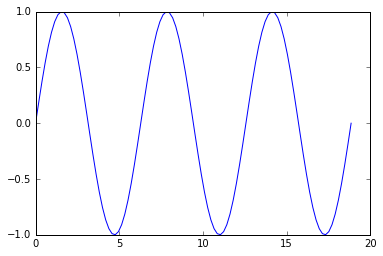

In [65]:
N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X, Y)

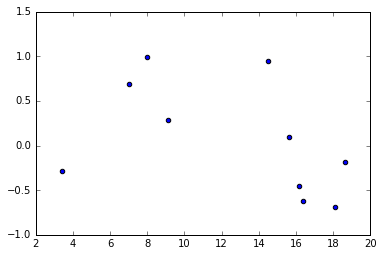

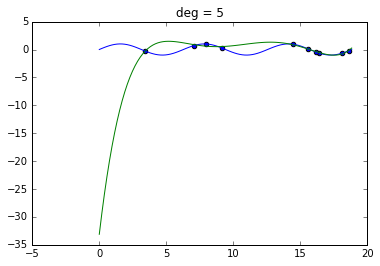

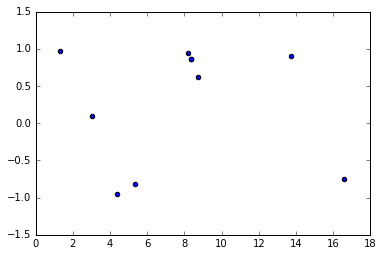

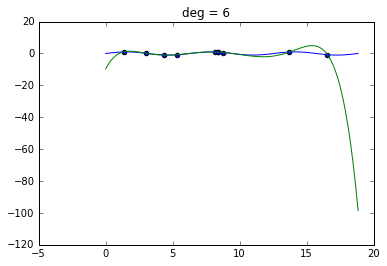

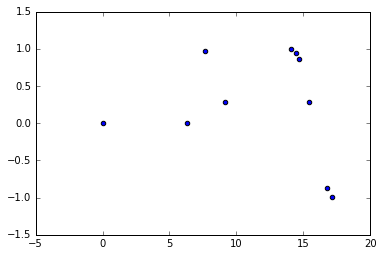

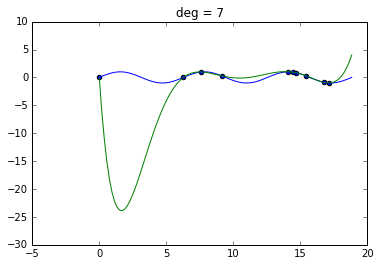

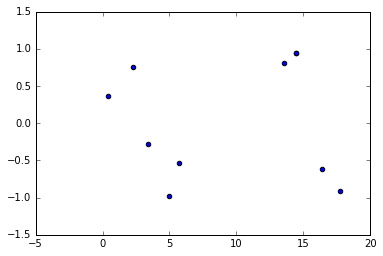

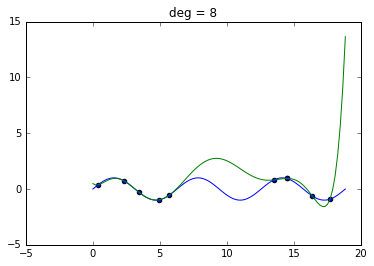

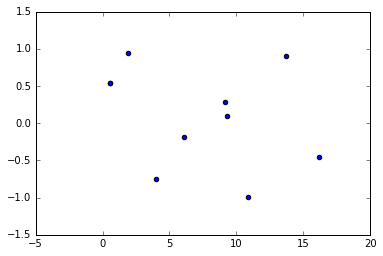

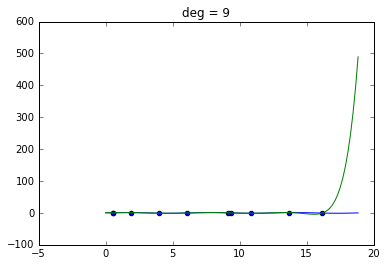

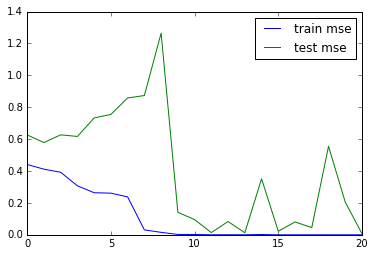

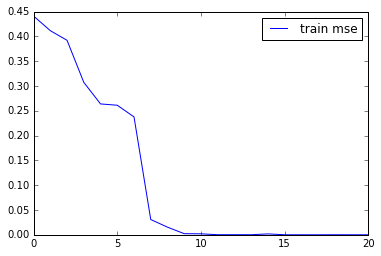

In [66]:
for deg in (5, 6, 7, 8, 9):
    fit_and_display(X, Y, 10, deg)
plot_train_vs_test_curves(X, Y)

### Categorical inputs
#### How to deal with things are not number
- Example: output = salary
- Inputs: gender, age, degree type, years of experience, GPA

#### Solutions:
- One-hot encoding:
- Degree type = bachelors, masters, PhD
- Bachelors = [1, 0, 0]
- Masters = [0, 1, 0]
- PhD = [0, 0, 1]

#### Specific example:
Let:
- y = salary
- x1 = 1 if female
- x2 = 1 if male
- y = 50000 - 5000x1 + 5000x2

Predicted vales:
- E(y | female) = 45000
- E(y | male)   = 55000

Another way:

Let:
- y = salary
- x = 1 if male, 0 if female
- y = 45000 + 10000x



### L2 Regularization

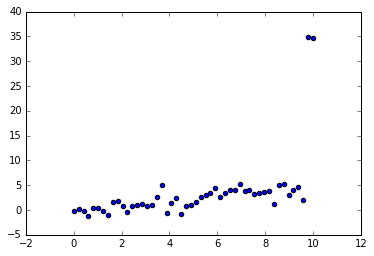

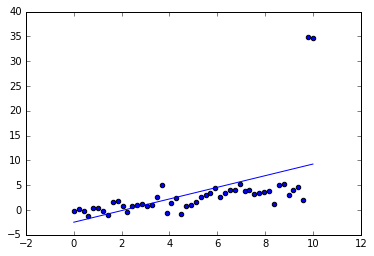

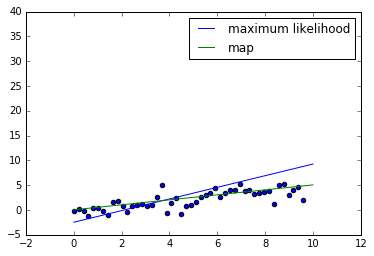

In [76]:
# demonstration of L2 regularization
#
# notes for this course can be found at:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# https://www.udemy.com/data-science-linear-regression-in-python

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 50 # Number of samples = 50

# generate the data
X = np.linspace(0, 10, N) # Create X
Y = 0.5*X + np.random.randn(N) # Y = 0.5X + random noise

# make outliers, the last 2 samples are outliers
Y[-1] += 30
Y[-2] += 30

# plot the data
plt.scatter(X, Y)
plt.show()

# add bias term
X = np.vstack([np.ones(N), X]).T

# plot the maximum likelihood solution
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml)
plt.show()

# plot the regularized solution
# probably don't need an L2 regularization this high in many problems
# everything in this example is exaggerated for visualization purposes
l2 = 1000.0 # lambda in the notes (See note 4)
w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, label='maximum likelihood')
plt.plot(X[:,1], Yhat_map, label='map')
plt.legend()

### Exercise: Try to optimize:
J(w1, w2) = w1 ^2 + w2 ^4

Using Gradient descent

- First, we need: dJ / dw1 = 2w1
- dJ / dw2 = 4w2 ^ 3


In [91]:
w1 = 20
w2 = 10
w1_gradient = 0
w2_gradient = 0
learning_rate = 0.01

for i in xrange(100000):
    w1 = w1 - learning_rate * 2 * w1
    w2 = w2 - learning_rate * 4 * (w2 ** 3)
    
w1, w2

OverflowError: (34, 'Result too large')

X: [[ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]]


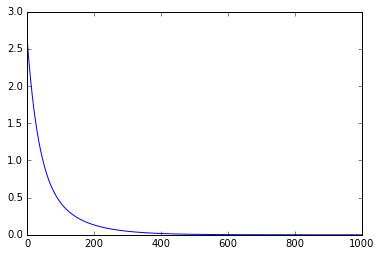

final w: [ 0.07374065 -0.06725451  0.91977251]


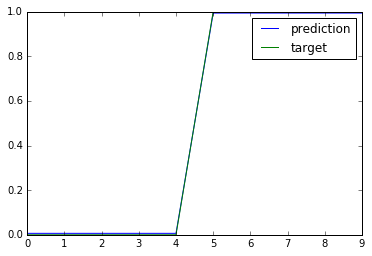

In [93]:
# notes for this course can be found at:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# https://www.udemy.com/data-science-linear-regression-in-python

import numpy as np
import matplotlib.pyplot as plt

N = 10
D = 3
X = np.zeros((N, D))
X[:,0] = 1 # bias term
X[:5,1] = 1
X[5:,2] = 1
Y = np.array([0]*5 + [1]*5)

# print X so you know what it looks like
print "X:", X

# won't work! Because of singular matrix
# w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

# let's try gradient descent
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
for t in xrange(1000):
  # update w
  Yhat = X.dot(w)
  delta = Yhat - Y
  w = w - learning_rate*X.T.dot(delta)

  # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)

# plot the costs
plt.plot(costs)
plt.show()

print "final w:", w

# plot prediction vs target
plt.plot(Yhat, label='prediction')
plt.plot(Y, label='target')
plt.legend()
plt.show()